The idea is to compare or suggest a better model for predicion of VLSI Mosfet characteristics.The first model trained and tested was the one originally used for prediction in the website https://medium.com/@subirmaity/vlsi-mosfet-characteristics-prediction-using-neural-network-d1c221a11316#:~:text=A%20new%20approach%20to%20model,backbone%20of%20today's%20VLSI%20chip.

But another model made with Relu activation function doesn't necessarily perform better(still doesn't give too much of a reduced accuracy) but takes only 1/3 of the training time of the original model.

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"F:\Sem6\DeepLearning Project\archive (4)\training_data.csv")
df["Id"].replace({0:1e-13}, inplace=True)
df["Vgs"].replace({0:1e-3}, inplace=True)
df["Vds"].replace({0:1e-3}, inplace=True)
id=df["Id"]
Vgs=df["Vgs"]
Vds=df["Vds"]
yy=np.ravel(id)
X1=df.iloc[:,0:2]
X=np.log10(X1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = np.log10(yy)



C:\Users\vvaib\AppData\Local\Temp\ipykernel_21568\1235553502.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Id"].replace({0:1e-13}, inplace=True)
C:\Users\vvaib\AppData\Local\Temp\ipykernel_21568\1235553502.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [4]:
# Split train and test dataset
from sklearn.model_selection import train_test_split
#Normalize data before training
y=np.log10(yy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)


In [6]:
# Originally which is used in the website https://medium.com/@subirmaity/vlsi-mosfet-characteristics-prediction-using-neural-network-d1c221a11316#:~:text=A%20new%20approach%20to%20model,backbone%20of%20today's%20VLSI%20chip.
model = tf.keras.Sequential()
model.add(keras.layers.Dense(16, activation='tanh', input_shape=(2,)))
model.add(keras.layers.Dense(16,activation='tanh'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_1 = model.fit(X_train, y_train, epochs=1000,
validation_data=(X_test, y_test))


Epoch 1/1000


c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 32.0554 - mae: 4.3410 - val_loss: 1.4293 - val_mae: 0.9951
Epoch 2/1000
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3849 - mae: 0.9748 - val_loss: 1.0274 - val_mae: 0.8376
Epoch 3/1000
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9191 - mae: 0.7802 - val_loss: 0.5692 - val_mae: 0.5953
Epoch 4/1000
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4980 - mae: 0.5417 - val_loss: 0.2904 - val_mae: 0.3978
Epoch 5/1000
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2743 - mae: 0.3664 - val_loss: 0.1549 - val_mae: 0.2650
Epoch 6/1000
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1480 - mae: 0.2421 - val_loss: 0.0851 - val_mae: 0.1866
Epoch 7/1000
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0956 - mae: 0.1800 - val_loss: 0.0580 - val_mae: 0.1433
Epoch 8/1000
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0632 - mae: 0.1420 - val_loss: 0.0455 - val_mae: 0.1221
Epoch 9/1000
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

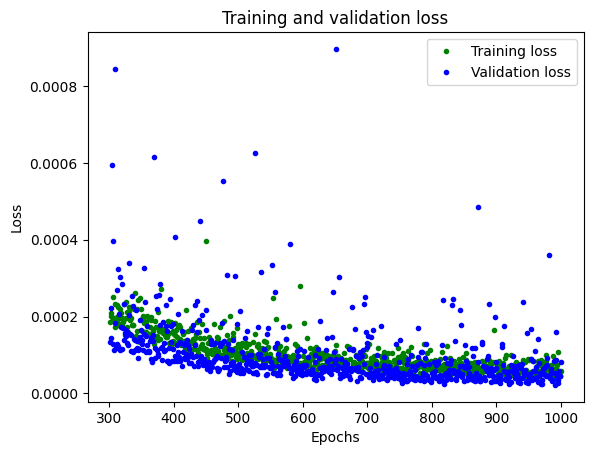

In [ ]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
SKIP = 300
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
import tensorflow as tf

# Model definition
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# Learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.1, min_lr=1e-6)

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)



# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=500,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])


Epoch 1/500


c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 17.2721 - mae: 2.7715 - val_loss: 0.1823 - val_mae: 0.2528 - learning_rate: 0.0010
Epoch 2/500
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4073 - mae: 0.4444 - val_loss: 0.0747 - val_mae: 0.2090 - learning_rate: 0.0010
Epoch 3/500
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2667 - mae: 0.3458 - val_loss: 0.1233 - val_mae: 0.2796 - learning_rate: 0.0010
Epoch 4/500
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1830 - mae: 0.2715 - val_loss: 0.0350 - val_mae: 0.1088 - learning_rate: 0.0010
Epoch 5/500
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1246 - mae: 0.2240 - val_loss: 0.0904 - val_mae: 0.2301 - learning_rate: 0.0010
Epoch 6/500
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0789 - mae: 0.1836 - val_loss: 0.0336 - val_mae: 0.1245 - learning_rate: 0.0010
Epoch 7/500
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0549 - mae: 0.1465 - val_loss: 0.0345 - val_mae: 0.1476 - learning_rate: 0.0010
Epoch 8/50

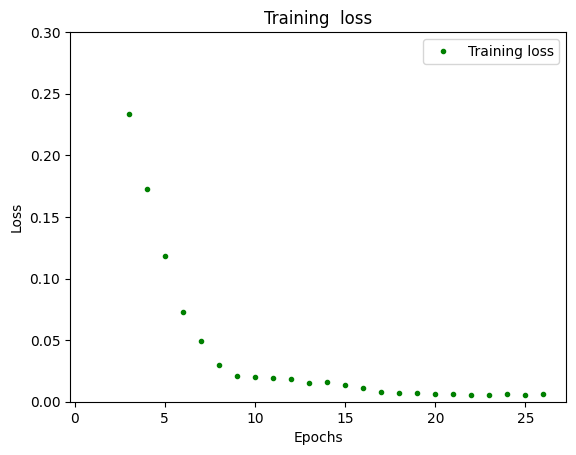

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,0.3)
plt.show()



In [17]:
from sklearn.svm import SVR

svm_model = SVR(kernel='rbf')  
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print("SVM MSE: " + str(mean_squared_error(y_test, y_pred_svm)))
print("SVM MAE: " + str(mean_absolute_error(y_test, y_pred_svm)))


c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM MSE: 0.3063423300977178
SVM MAE: 0.3661446719062409


In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest MSE: " + str(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest MAE: " + str(mean_absolute_error(y_test, y_pred_rf)))


c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 0.004910912873955324
Random Forest MAE: 0.0027741428166956467


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

print("Gradient Boosting MSE: " + str(mean_squared_error(y_test, y_pred_gbr)))
print("Gradient Boosting MAE: " + str(mean_absolute_error(y_test, y_pred_gbr)))



c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting MSE: 0.0009996316109205411
Gradient Boosting MAE: 0.01387173429981636


Fitting 5 folds for each of 54 candidates, totalling 270 fits


c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\vvaib\AppData\Local

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Best CV MSE: 0.00029563350967110107


c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting MSE: 9.436559254942017e-05
Gradient Boosting MAE: 0.004426206065720892


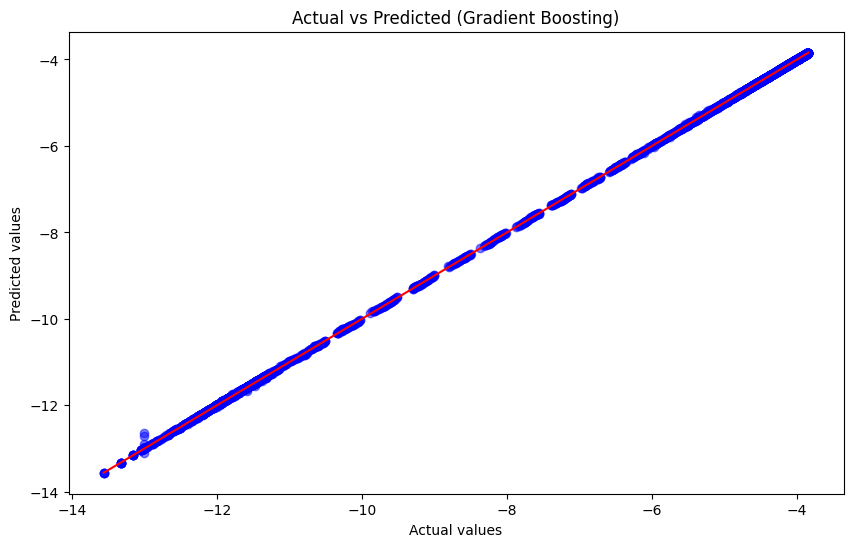

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV MSE: {-grid_search.best_score_}")

gbr_best = grid_search.best_estimator_


gbr_best.fit(X_train_scaled, y_train)


y_pred_gbr = gbr_best.predict(X_test_scaled)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

print(f"Gradient Boosting MSE: {mse_gbr}")
print(f"Gradient Boosting MAE: {mae_gbr}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  
plt.title('Actual vs Predicted (Gradient Boosting)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()



c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\vvaib\AppData\Local

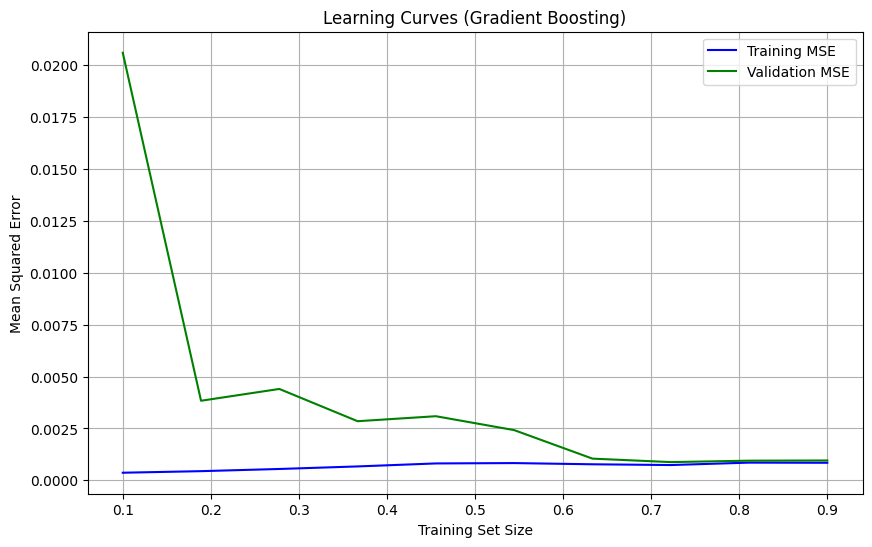

In [35]:
train_sizes = np.linspace(0.1, 0.9, 10)  # Define the range of training sizes from 0.1 to 0.9
train_scores, test_scores = [], []

for train_size in train_sizes:
    # Split the dataset based on the current train_size
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train_scaled, y_train, 
                                                               train_size=train_size, random_state=42)
    
    # Fit the model on the partial training data
    gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    gbr_model.fit(X_train_partial, y_train_partial)
    
    # Append MSE for both training and testing sets
    train_scores.append(mean_squared_error(y_train_partial, gbr_model.predict(X_train_partial)))
    test_scores.append(mean_squared_error(y_test, gbr_model.predict(X_test_scaled)))

# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Training MSE', color='blue')
plt.plot(train_sizes, test_scores, label='Validation MSE', color='green')
plt.title('Learning Curves (Gradient Boosting)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()
